# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Phelipe Müller </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [5]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [108]:
Norte = 0
Sul = 0
def Hemisferio(df):
    global Norte, Sul
    if df["Latitude"]>0:
        if df["Type"]=="Earthquake":Norte+=1
        return "Norte"
    else:
        if df["Type"]=="Earthquake":Sul+=1
        return "Sul"


df["Hemisfério"] = df.apply(Hemisferio,axis=1)

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B63C728D30>]], dtype=object)

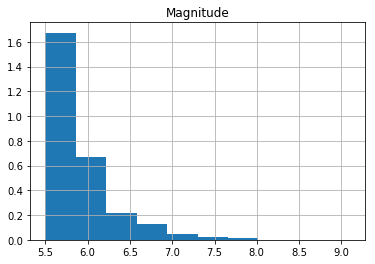

In [109]:
df.hist("Magnitude", normed=True)

<h5> A Magnitude dos eventos parece se comportar como uma exponencial com a base entre 0 e 1, tendo eventos de alta magnitude muito mais raros que os de baixa magnitude </h5>

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [128]:
X = df["Magnitude"]
loc, scale = expon.fit(X)
loc, scale

(5.4999999996710809, 0.38254864885090978)

<h5> Os parametros encontrados parecem bastante promissores, dado que o ponto inicial dos nossos dados é em 5.5 e se prestarmos atenção do grafico acima podemos dizer que o segundo bin é iniciado proximo ao ponto de magnitude 5.9 </h5>

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

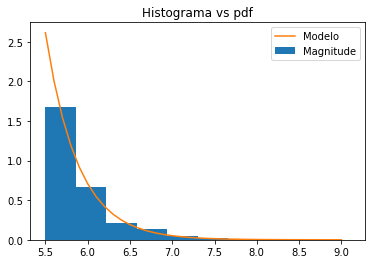

In [111]:
fig, ax = plt.subplots(1, 1)


ax.hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
ax.plot(x, expon.pdf(x, loc, scale))
ax.set_title('Histograma vs pdf')
ax.legend(['Modelo', 'Magnitude'])

<h5> Considerando o Equilibrio Variança-Vies, podemos assumir que o resultado acima é bastante aceitavel, ja que o modelo acompanha o a frequencia do evento e não existe uma superposição entre eles </h5>

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [124]:
pd.crosstab(df["Hemisfério"],df["Type"],normalize=True)

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [115]:
ProbNorte = Norte/(Norte+Sul)
ProbNorte

0.453485392106612

Explique o seu raciocínio

<h5> Dado o historico que possuo, posso fazer uma extrapolação linear e assumir que o comportamento do passado vai continuar a ocorrer no futuro, e calculando as ocorrencias de Terremonos no hemisfério norte pela ocorrencia no mundo, obtemos a frequencia e a assumimos como a esperança para o futuro </h5>

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [126]:
pd.crosstab(df["Hemisfério"],df["Type"],normalize=False)


Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,10468,2,147,0
Sul,12764,2,28,1


In [127]:
147/10617

0.013845719129697655

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é 1,38%

<h5>Usando a CrossTab não normalizada e somando a quantidade de enventos do norte, encontro um normalizador para usar na quantidade de Explosões Nucleares, como feito acima</h5>

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

Explique o que significa o valor da correlação calculada acima? 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes
